In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./data/telecom_churn.csv')

In [4]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

### *** Numerical variables
### The easiest way to take a look at the distribution of a numerical variable is to plot its histogram
### using the DataFrame's method hist().

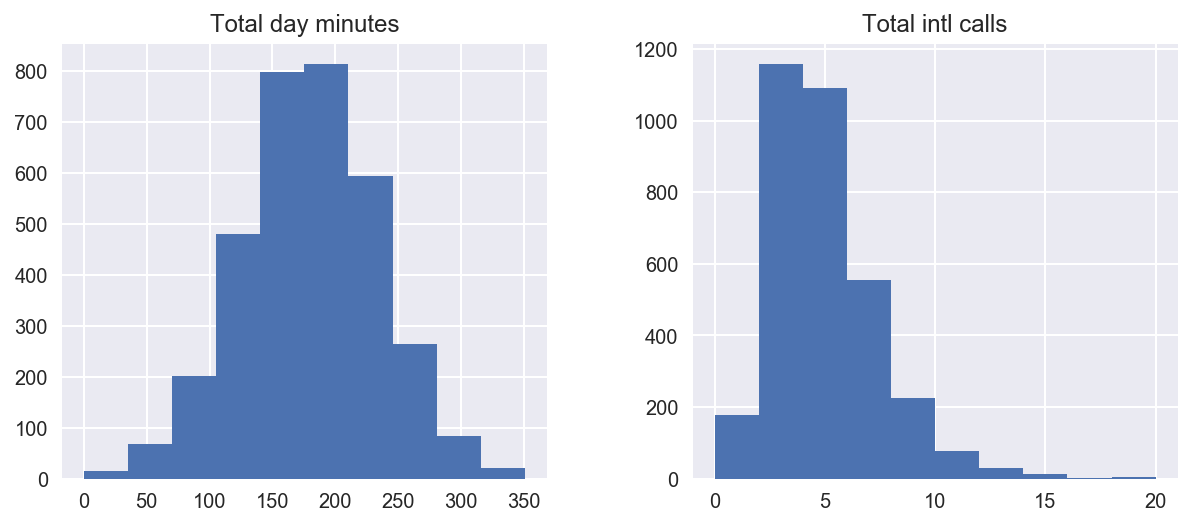

In [27]:
features = ['Total day minutes','Total intl calls']
df[features].hist(figsize=(10, 4));

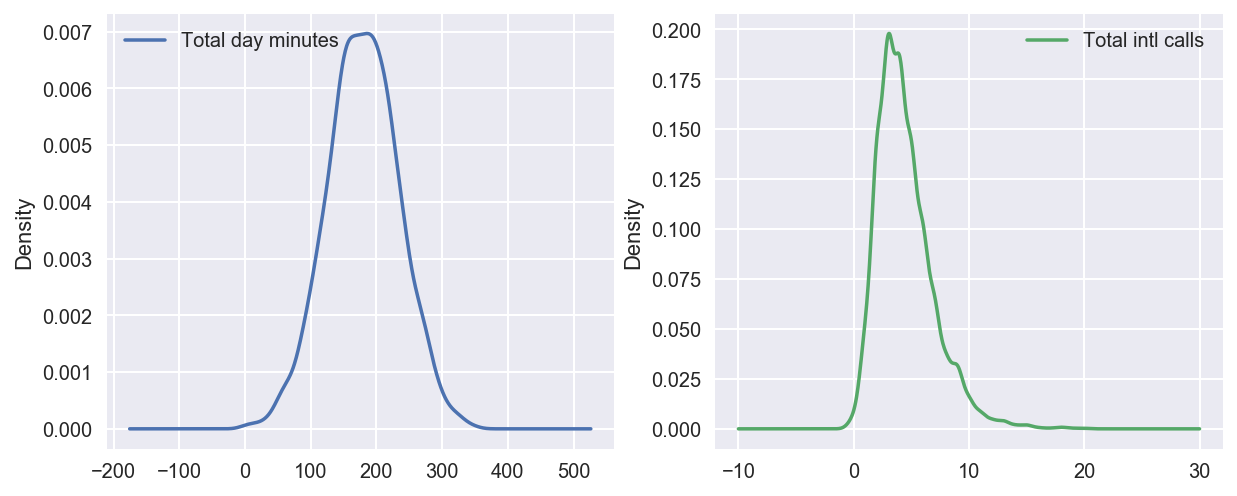

In [32]:
df[features].plot(kind='density',subplots=True, layout=(1,2), sharex=False, figsize=(10,4));

### It is also possible to plot a distribution of observations with seaborn's distplot().

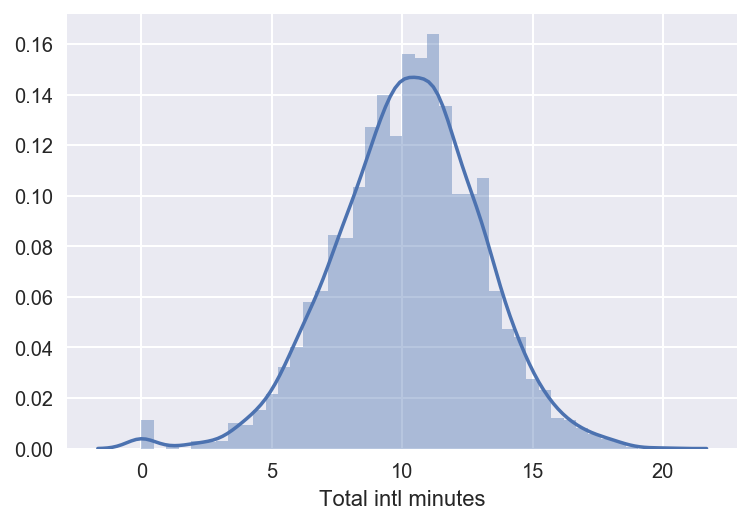

In [34]:
sns.distplot(df['Total intl minutes']);

### Box plot

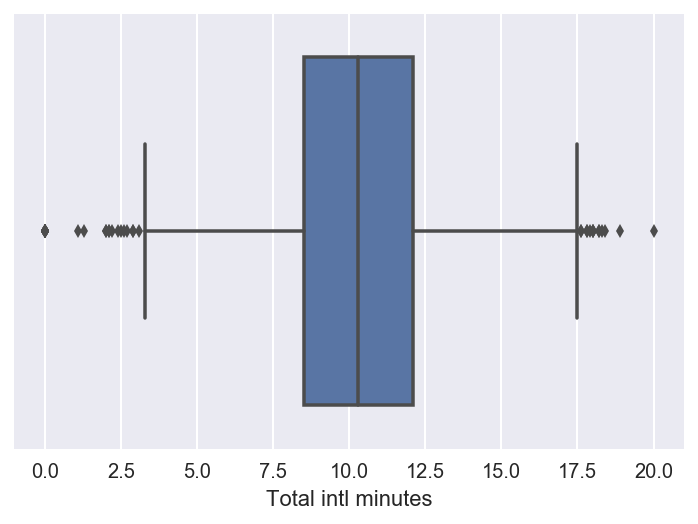

In [37]:
sns.boxplot(x= 'Total intl minutes', data= df);

### Violin plot

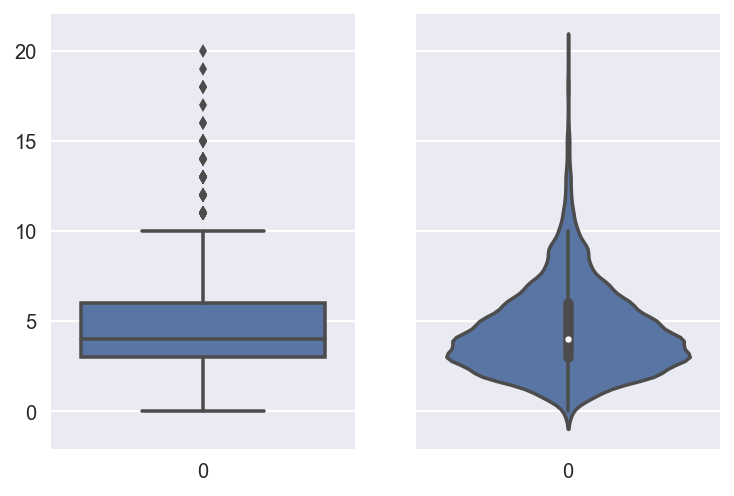

In [39]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data= df['Total intl calls'], ax= axes[0]);
sns.violinplot(data= df['Total intl calls'], ax= axes[1]);

### ***Categorical and binary features

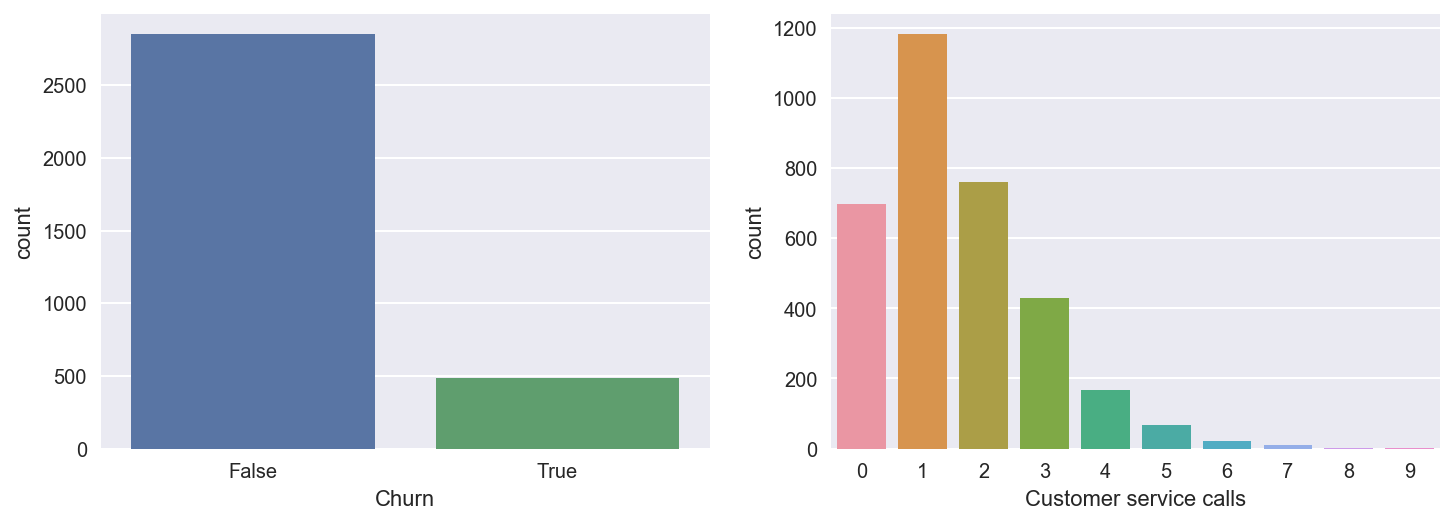

In [44]:
__, axes = plt.subplots(1, 2, figsize= (12,4))
sns.countplot(x= 'Churn', data= df, ax= axes[0]);
sns.countplot(x= 'Customer service calls', data = df, ax= axes[1]);

### *** Quantitative vs. Quantitative

### first we use method corr()

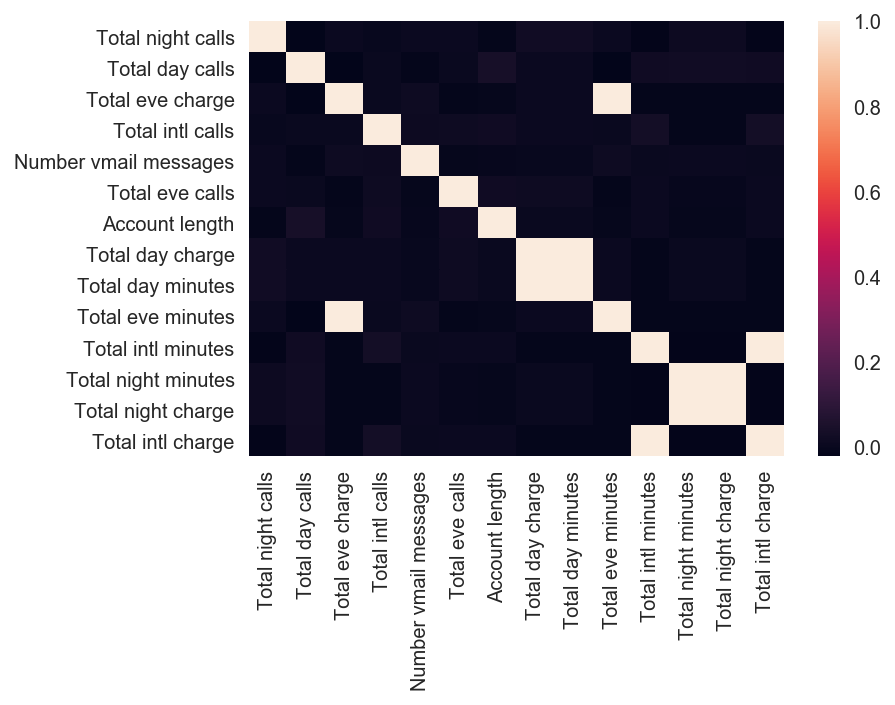

In [46]:
numerical = list(set(df.columns) - 
                 set(['State', 'International plan', 'Voice mail plan', 'Area code', 'Churn', 'Customer service calls']))
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

In [48]:
numerical = list(set(numerical) - 
                set(['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']))

### scatter plot
### The scatter plot displays values of two numerical variables

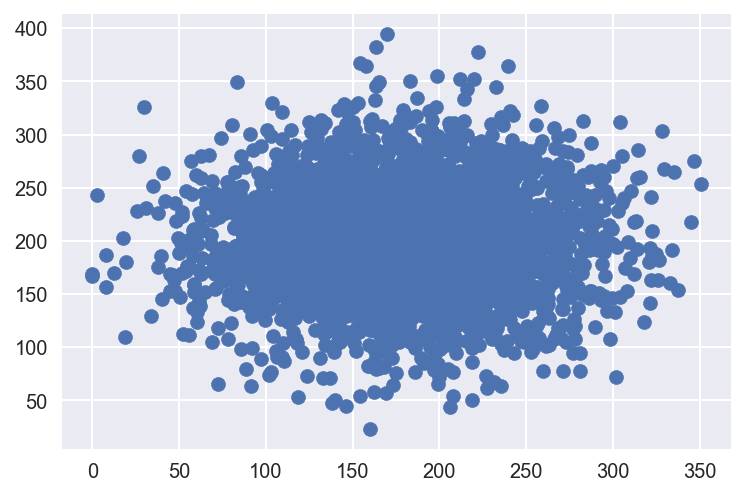

In [49]:
plt.scatter(df['Total day minutes'], df['Total night minutes']);

### scatter with seaborn is much better

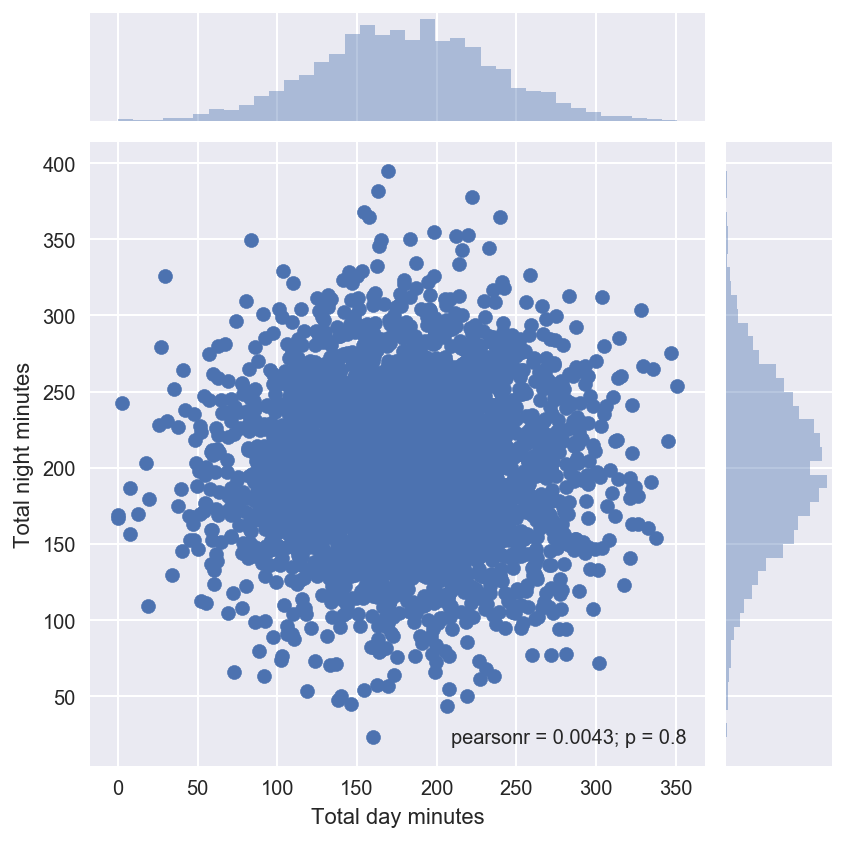

In [50]:
sns.jointplot(x= 'Total day minutes', y= 'Total night minutes', data = df, kind= 'scatter');

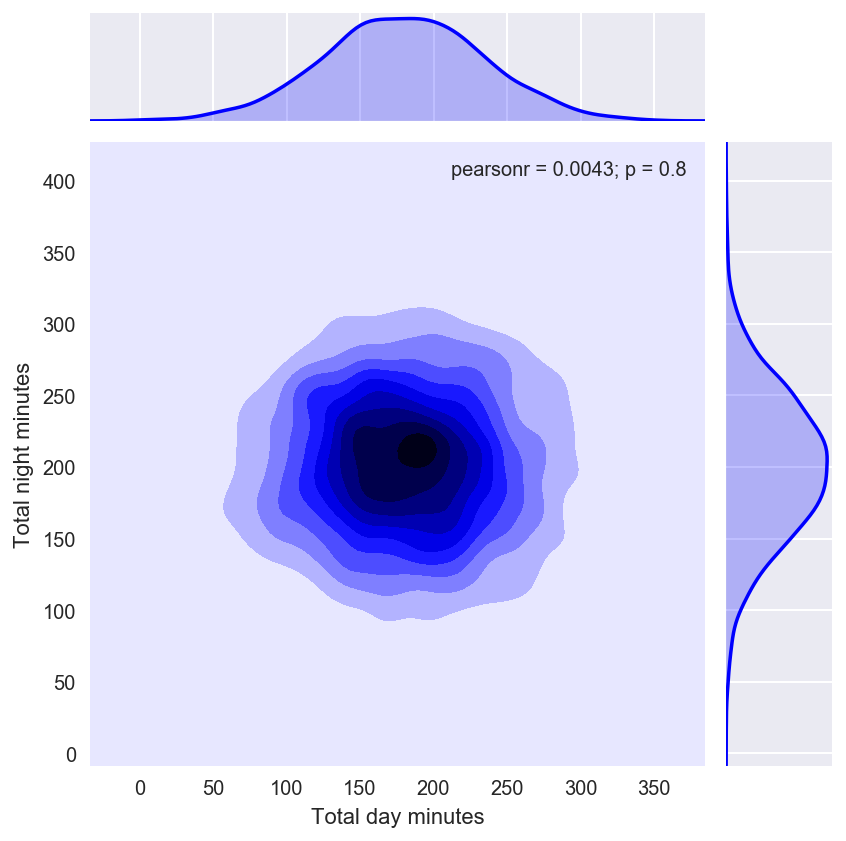

In [54]:
sns.jointplot('Total day minutes', 'Total night minutes',data= df, kind= 'kde', color= "b");

### Scatter plot matrix

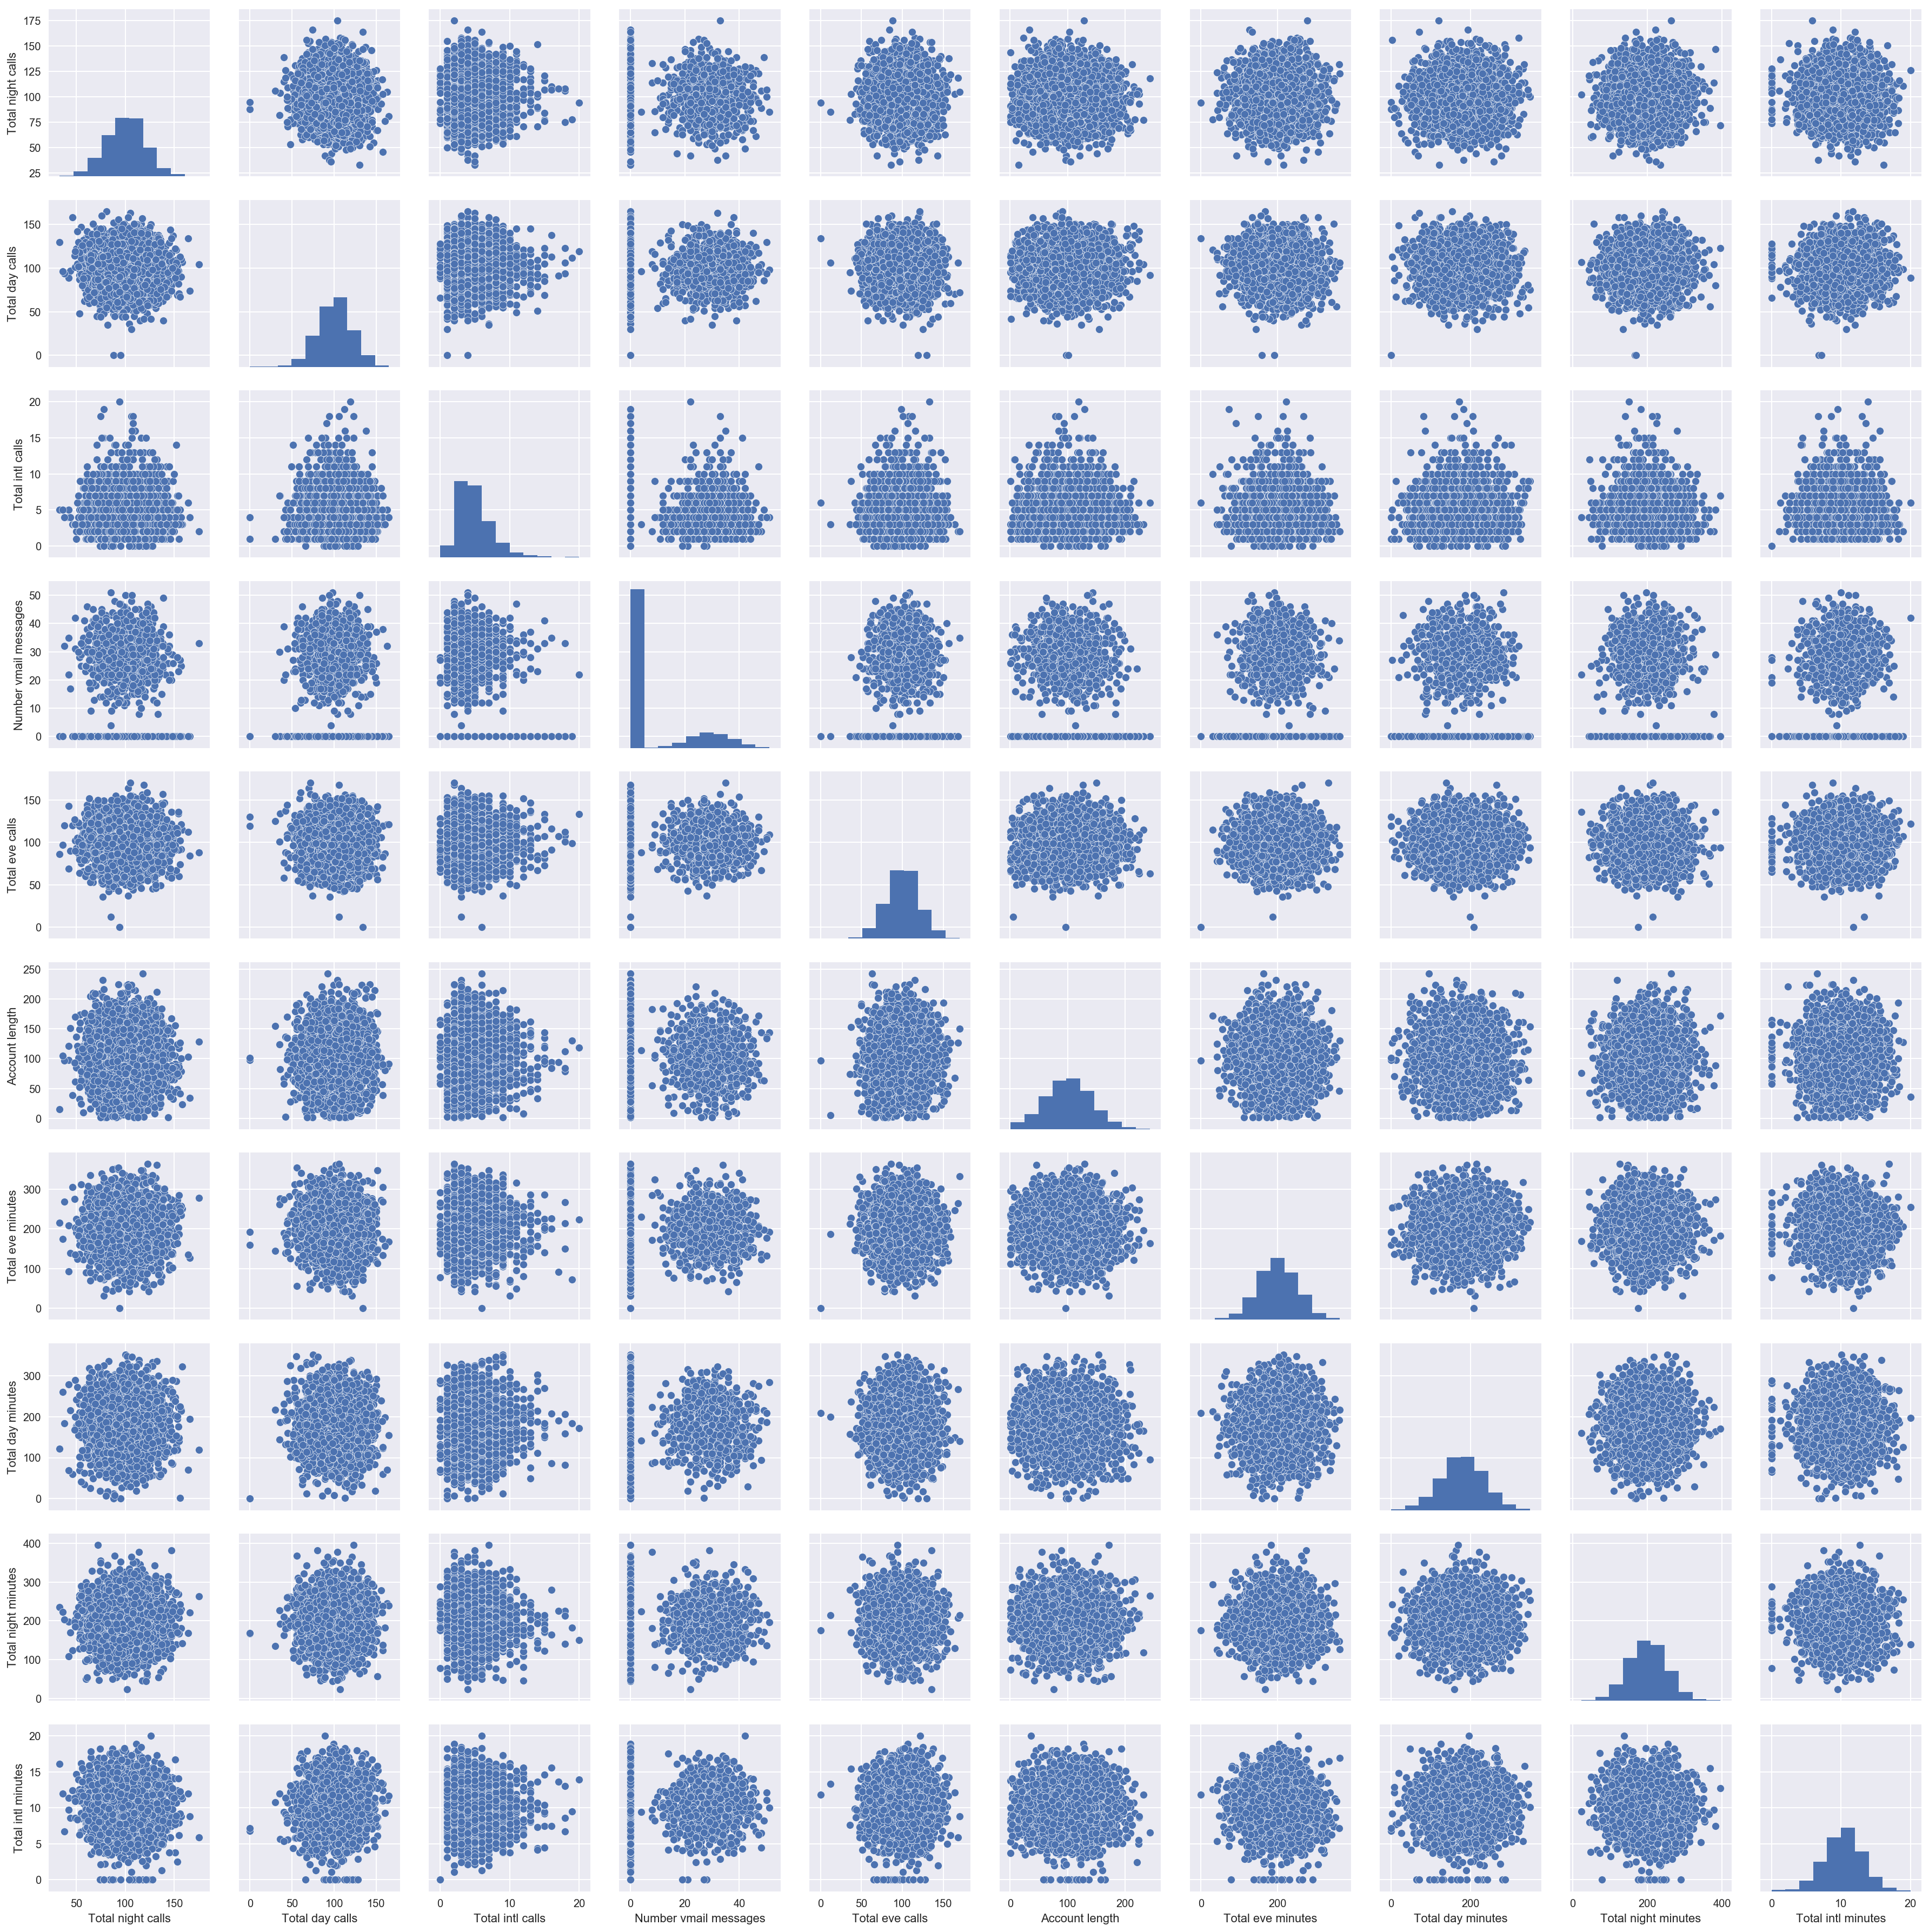

In [55]:
%config InlineBacknd.figure_format = 'png'
sns.pairplot(df[numerical]);

In [56]:
%config InlineBackend.figure_format = 'retina'

### Quantitative vs. Categorical

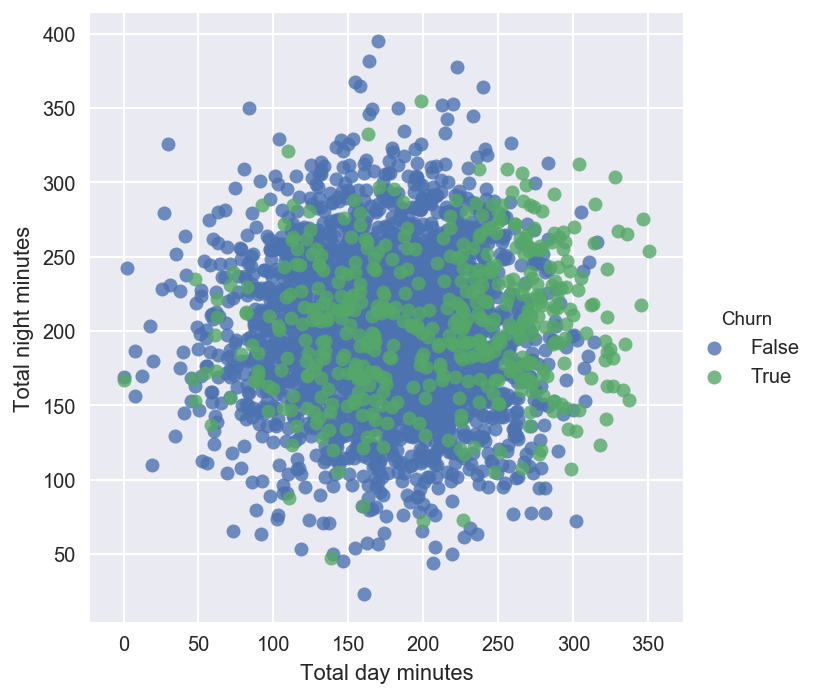

In [57]:
sns.lmplot('Total day minutes', 'Total night minutes', data= df, hue = 'Churn', fit_reg=False);

In [58]:
numerical.append('Customer service calls')

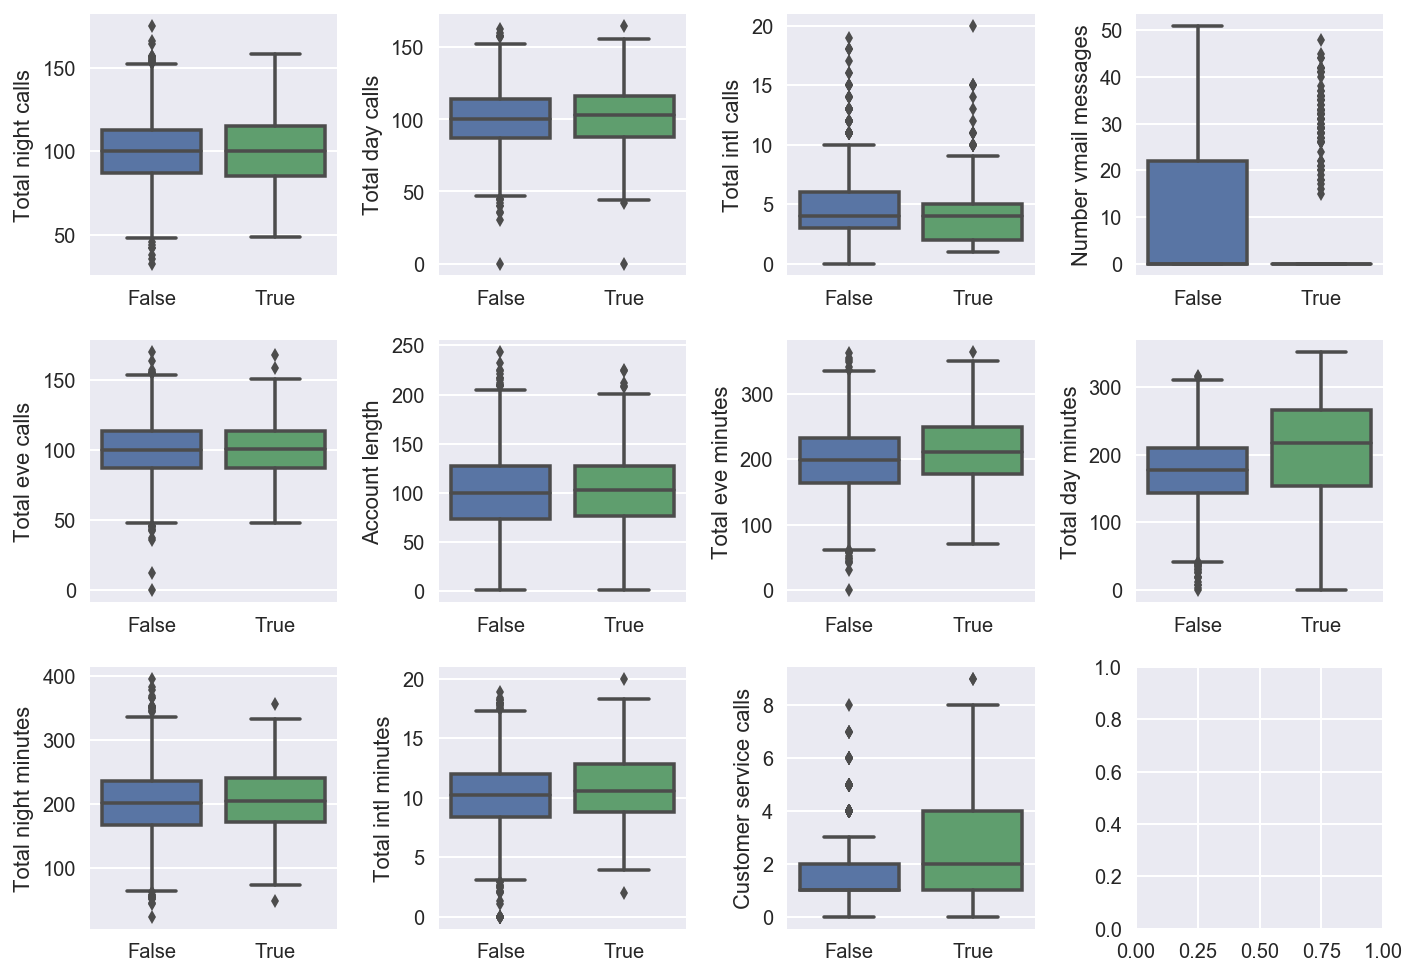

In [60]:
fig, axes = plt.subplots(3,4 , figsize= (10,7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x= 'Churn',y= feat, data= df, ax= ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

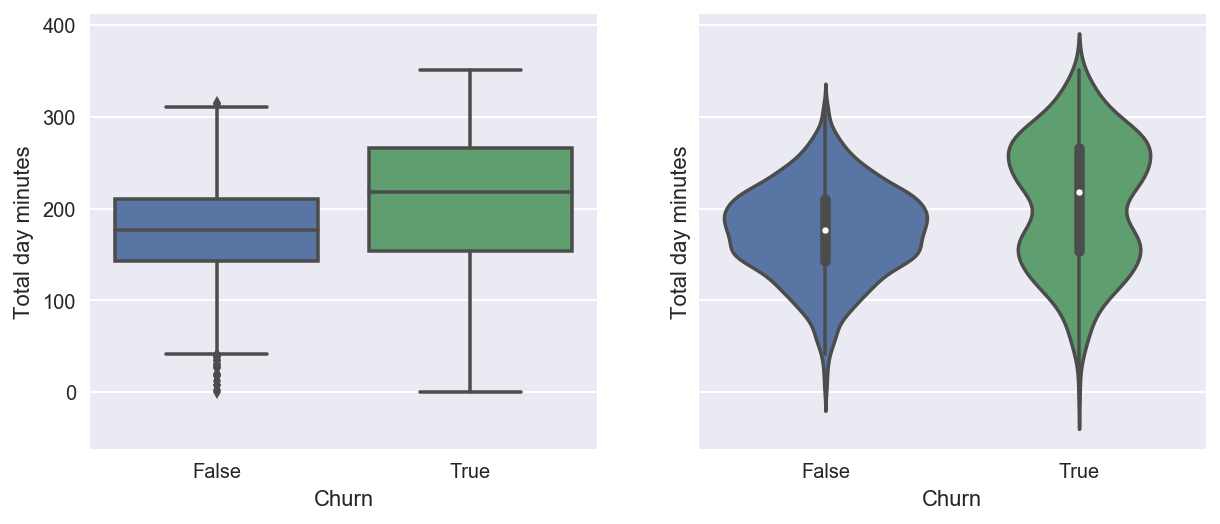

In [66]:
_, axes = plt.subplots(1, 2, sharey=True,figsize= (10,4))
sns.boxplot(x= 'Churn', y= 'Total day minutes', data= df, ax = axes[0]);
sns.violinplot(x= 'Churn', y= 'Total day minutes', data= df, ax = axes[1]);

In [68]:
sns.catplot(x='Churn', y='Total day minutes', col='Customer service calls',
               data=df[df['Customer service calls'] < 8], kind="box",
               col_wrap=4, height=3, aspect=.8);

AttributeError: module 'seaborn' has no attribute 'catplot'

### Categorical vs. Categorical

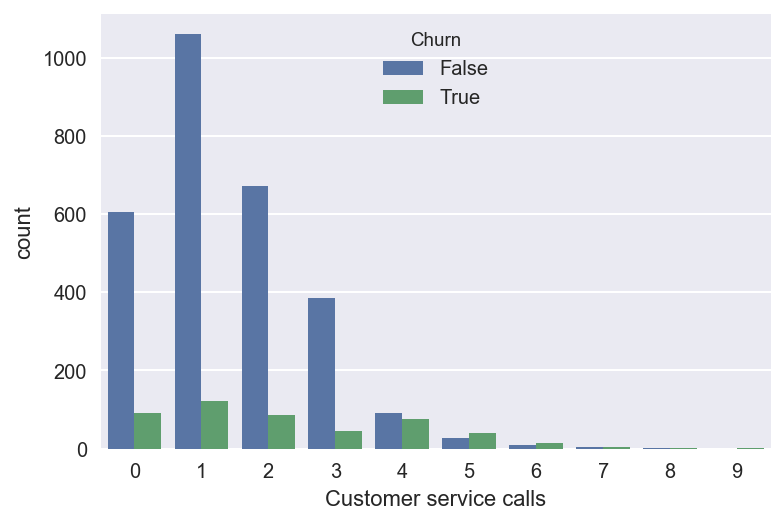

In [69]:
sns.countplot(x= 'Customer service calls', hue='Churn', data= df);

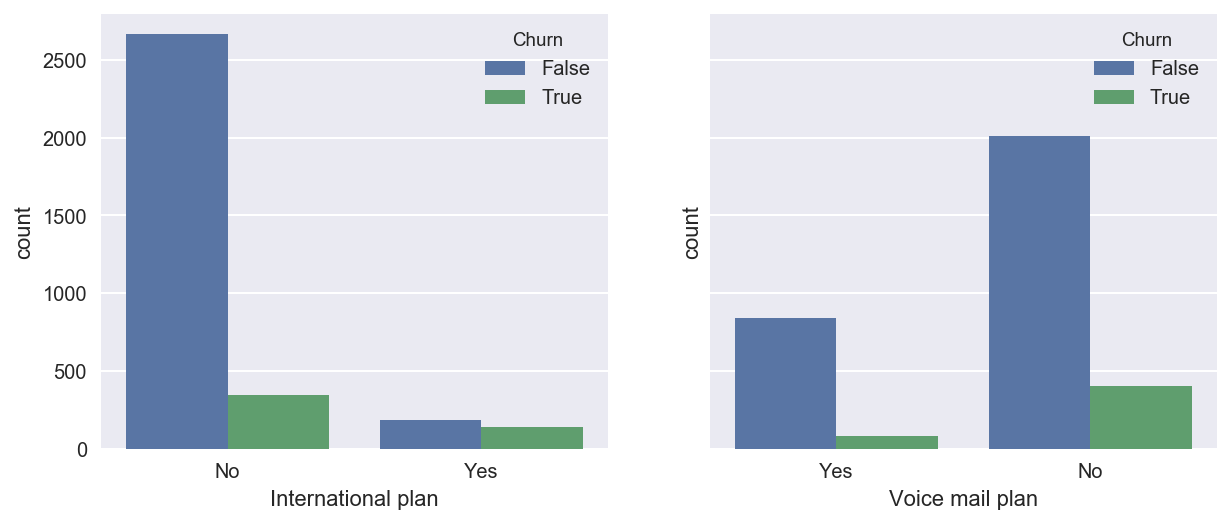

In [75]:
_, axes = plt.subplots(1,2, sharey=True, figsize= (10,4))
sns.countplot(x='International plan', hue= 'Churn', data= df, ax= axes[0]);
sns.countplot(x='Voice mail plan', hue= 'Churn', data= df, ax= axes[1]);

In [78]:
pd.crosstab(df['State'], df['Churn']).T

State  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL ...  SD  TN  TX  UT  VA  VT  WA  \
Churn                                         ...                               
False  49  72  44  60  25  57  62  49  52  55 ...  52  48  54  62  72  65  52   
True    3   8  11   4   9   9  12   5   9   8 ...   8   5  18  10   5   8  14   

State  WI  WV  WY  
Churn              
False  71  96  68  
True    7  10   9  

[2 rows x 51 columns]

In [89]:
df.groupby('State')['Churn'].agg([np.mean]).sort_values(by='mean',ascending=False).T

State        NJ        CA    TX        MD        SC        MI        MS  \
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385   

State        NV        WA        ME    ...           RI        WI        IL  \
mean   0.212121  0.212121  0.209677    ...     0.092308  0.089744  0.086207   

State        NE        LA        IA        VA      AZ        AK        HI  
mean   0.081967  0.078431  0.068182  0.064935  0.0625  0.057692  0.056604  

[1 rows x 51 columns]

In [83]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [84]:
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = X['International plan'].map({'Yes' : 1, 'No' : 0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes' : 1, 'No' : 0})

In [85]:
scaler = StandardScaler()

In [86]:
X_scaled = scaler.fit_transform(X)

In [87]:
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

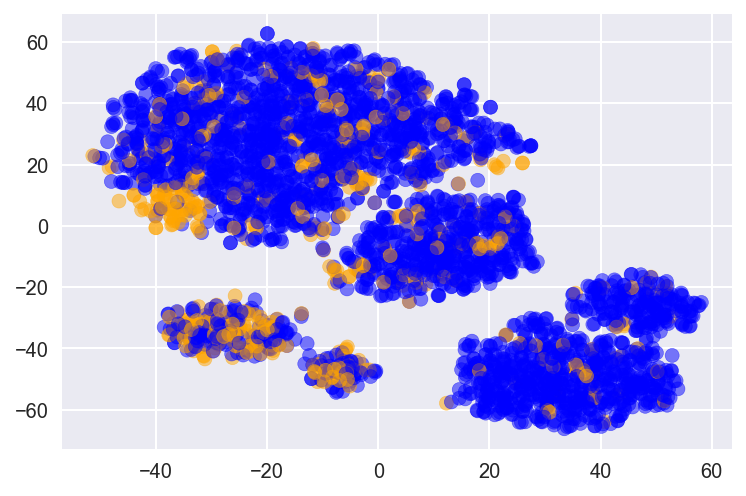

In [88]:
plt.scatter(tsne_repr[:, 0], tsne_repr[: , 1],
           c=df['Churn'].map({False: 'Blue', True: 'orange'}), alpha=.5);